In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Load Dataset
df = pd.read_csv('/content/lapdata.csv', encoding='ISO-8859-1')
df.head()

,Product,Processor,Ram,Memory,OS,Size,Price
0,MSI Stealth GS77 12UHS-226IN,12th Gen Core i9,32?GB DDR5 RAM,2?TB SSD,Windows 11 OS,17.3?inches,"3,00,990"
1,MSI Titan GT77 HX 13VI-092IN,13th Gen Intel Core i9 13980HX,64?GB DDR5 RAM,4?TB SSD,Windows 11 OS,17.3?inches,"5,99,990"
2,Acer Predator Helios 500 Ph517-52,11th Gen Intel Core i9 11980HK,64?GB DDR4 RAM,2?TB SSD,Windows 10 OS,17.3?inches,"4,42,605"
3,MSI Titan GT77 HX 13VH-093IN,13th Gen Intel Core i9 13980HX,64?GB DDR5 RAM,2?TB SSD,Windows 11 OS,17.3?inches,"4,89,990"
4,MSI Stealth GS66 12UGS-290IN,12th Gen Intel Core i7 12700H,32?GB DDR5 RAM,1?TB SSD,Windows 11 OS,15.6?inches,"1,95,990"


In [6]:
# 🧹 Preprocessing
# Clean price column - Removed as it seems to be already in float format

# Remove non-numeric characters and convert to float for Ram and Size
df['Ram'] = df['Ram'].astype(str).str.replace(r'[^\d\.]', '', regex=True).astype(float)
df['Size'] = df['Size'].astype(str).str.replace(r'[^\d\.]', '', regex=True).astype(float)

# Encode categorical features
le = LabelEncoder()
df['Processor'] = le.fit_transform(df['Processor'])
df['Memory'] = le.fit_transform(df['Memory'])

# Check if 'OS' column exists before encoding
if 'OS' in df.columns:
    df['OS'] = le.fit_transform(df['OS'])

In [7]:
# Add Price Category
df['PriceCategory'] = pd.qcut(df['Price'], q=3, labels=['Murah', 'Sedang', 'Mahal'])

Visualization

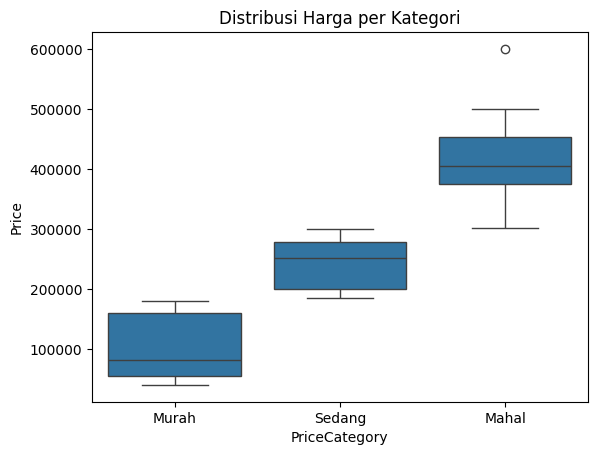

In [8]:
sns.boxplot(x='PriceCategory', y='Price', data=df)
plt.title('Distribusi Harga per Kategori')
plt.show()

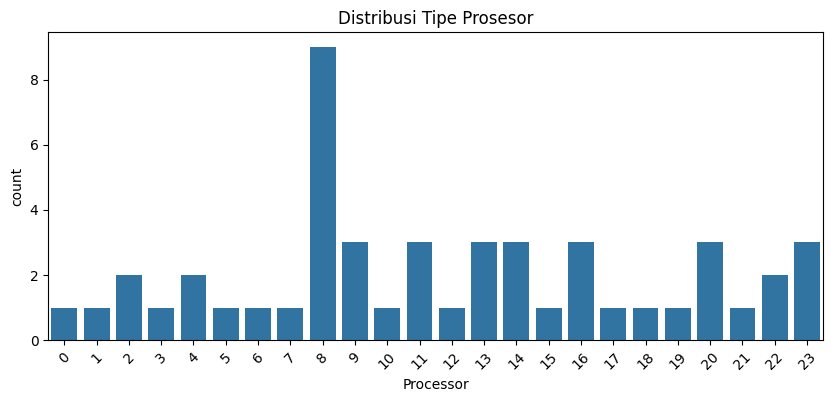

In [10]:
plt.figure(figsize=(10,4))
sns.countplot(x='Processor', data=df)
plt.title('Distribusi Tipe Prosesor')
plt.xticks(rotation=45)
plt.show()

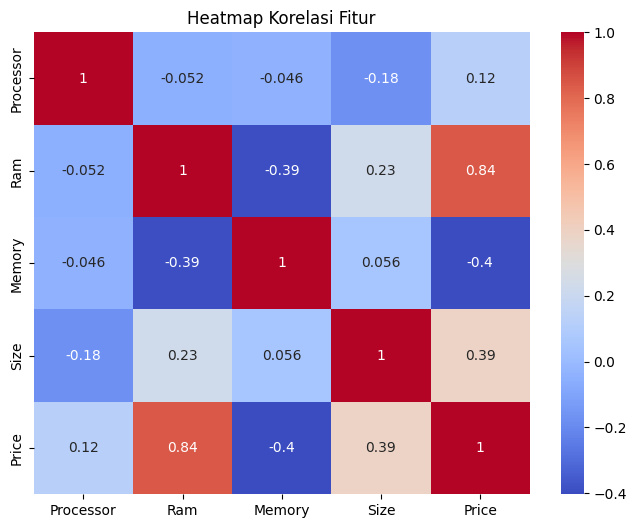

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Processor', 'Ram', 'Memory', 'Size', 'Price']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Fitur')
plt.show()

In [9]:
# Modeling
# Define features and target
X = df[['Processor', 'Ram', 'Memory', 'Size']]
y = df['PriceCategory']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[0 0 2]
 [0 3 1]
 [0 0 4]]
              precision    recall  f1-score   support

       Mahal       0.00      0.00      0.00         2
       Murah       1.00      0.75      0.86         4
      Sedang       0.57      1.00      0.73         4

    accuracy                           0.70        10
   macro avg       0.52      0.58      0.53        10
weighted avg       0.63      0.70      0.63        10



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
